In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, chi2, pointbiserialr 
from library.utils import save_file
from library.functions import (groupbySummary, groupbyCounts, 
                              buildContingencyTable, computeChiSquareStatistics, computePointBiserialR)

In [2]:
loan_eda_v1 = pd.read_csv('../data/interim/sba_national_final_ver1.csv')

In [97]:
loan_eda_v1.head()

,City,State,Zip,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,...,NAICS_sectors,isFranchise,RevLineCr_v2,LowDoc_v2,MIS_Status_v2,unemployment_rate,gdp_growth,gdp_annual_change,inflation_rate,inf_rate_annual_chg
0,EVANSVILLE,IN,47711,1997,84,4,2,0,0,0,...,45,0,2,1,0,3.5,4.4472,0.67,2.3377,-0.59
1,NEW PARIS,IN,46526,1997,60,2,2,0,0,0,...,72,0,2,1,0,3.5,4.4472,0.67,2.3377,-0.59
2,BLOOMINGTON,IN,47401,1997,180,7,1,0,0,0,...,62,0,2,2,0,3.5,4.4472,0.67,2.3377,-0.59
3,BROKEN ARROW,OK,74012,1997,60,2,1,0,0,0,...,0,0,2,1,0,4.1,4.4472,0.67,2.3377,-0.59
4,ORLANDO,FL,32801,1997,240,14,1,7,7,0,...,0,0,2,2,0,4.8,4.4472,0.67,2.3377,-0.59


In [6]:
## target feature to be used throughout all of the analysis
target = 'MIS_Status_v2'

In [12]:
def producePercentBarChart(df, x, hue):
    """
    Produce Bar Chart for normalized categorical to categorical comparisons
    """
    sns.catplot(kind='bar',
                x=x,
                y='percent',
                hue=hue,
                data=df
               )
    plt.show()


def produceStripPlot(df, x, y):
    """
    Produce strip plot for categorical to numerical comparisons
    """
    sns.catplot(kind='strip',
                x=x,
                y=y,
                data=df
               )
    plt.show()

In [7]:
def cat2catComparison(df, target, col):
    observedFrequencies = groupbyCounts(df, target, col)
    contingencyTable = buildContingencyTable(df, target, col)
    chisq_test_stat, chisq_crit_value, chisq_p_val = computeChiSquareStatistics(contingencyTable)
    return observedFrequencies, chisq_test_stat, chisq_crit_value, chisq_p_val

In [8]:
def cat2contComparison(df, target, col):
    summaryStats = groupbySummary(df, target, col)
    pb_corr, pb_p_val = computePointBiserialR(df, target, col)
    return summaryStats, pb_corr, pb_p_val

# Exploratory Data Analysis 

## Categorical Analysis to MIS_Status_V2

### NewExist

In [18]:
ne_observations, ne_test_stat, ne_crit_val, ne_p_val = cat2catComparison(loan_eda_v1, target, 'NewExist')

In [19]:
## NewExist 0 = undefined, 1 = existing business, 2 = new business

display(ne_observations)

,NewExist,MIS_Status_v2,percent
0,0,0,93.674177
1,0,1,6.325823
2,1,0,82.939923
3,1,1,17.060077
4,2,0,81.287243
5,2,1,18.712757


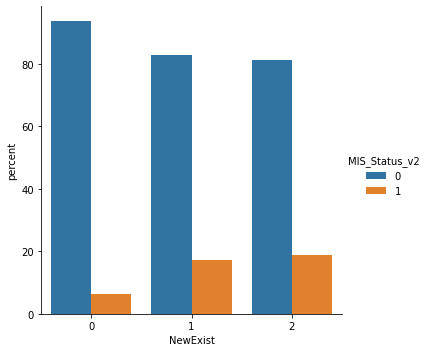

In [20]:
producePercentBarChart(ne_observations, 'NewExist', target)

In [21]:
print(ne_test_stat, ne_crit_val, ne_p_val)

0.07498872249066284 1.386294361119891 0.9631998489531541


### UrbanRural

In [22]:
ur_observations, ur_test_stat, ur_crit_val, ur_p_val = cat2catComparison(loan_eda_v1, target, 'UrbanRural')

In [23]:
## UrbanRural: 1 = Urban, 2 = Rural, 0 = Undefined

display(ur_observations)

,UrbanRural,MIS_Status_v2,percent
0,0,0,93.137558
1,0,1,6.862442
2,1,0,75.510692
3,1,1,24.489308
4,2,0,81.155764
5,2,1,18.844236


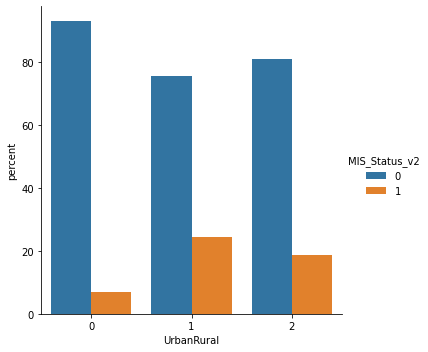

In [24]:
producePercentBarChart(ur_observations, 'UrbanRural', target)

In [25]:
print(ur_test_stat, ur_crit_val, ur_p_val)

0.11630843383315549 1.386294361119891 0.9435044318723453


### NAICS_Sectors

In [26]:
na_observations, na_test_stat, na_crit_val, na_p_val = cat2catComparison(loan_eda_v1, target, 'NAICS_sectors')

In [27]:
display(na_observations)

,NAICS_sectors,MIS_Status_v2,percent
0,0,0,92.087202
1,0,1,7.912798
2,11,0,90.967958
3,11,1,9.032042
4,21,0,91.235060
5,21,1,8.764940
6,22,0,85.604900
7,22,1,14.395100
8,23,0,76.703645
9,23,1,23.296355


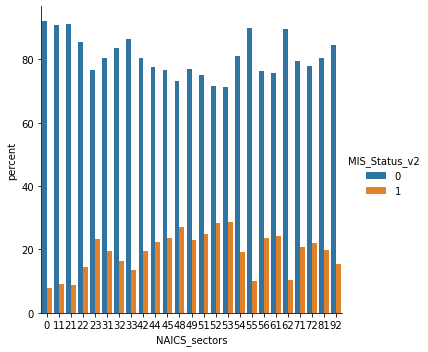

In [28]:
producePercentBarChart(na_observations, 'NAICS_sectors', target)

In [29]:
print(na_test_stat, na_crit_val, na_p_val)

0.6221038177759768 23.336726306089535 0.9999999999999987


### isFranchise

In [32]:
fr_observations, fr_test_stat, fr_crit_val, fr_p_val = cat2catComparison(loan_eda_v1, target, 'isFranchise')

In [33]:
display(fr_observations)

,isFranchise,MIS_Status_v2,percent
0,0,0,82.346150
1,0,1,17.653850
2,1,0,84.820405
3,1,1,15.179595


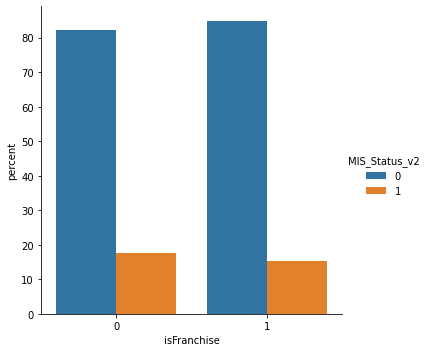

In [34]:
producePercentBarChart(fr_observations, 'isFranchise', target)

In [35]:
print(fr_test_stat, fr_crit_val, fr_p_val)

0.0 0.454936423119572 1.0


### RevLineCr_v2

In [36]:
rl_observations, rl_test_stat, rl_crit_val, rl_p_val = cat2catComparison(loan_eda_v1, target, 'RevLineCr_v2')

In [37]:
### 0 = undefined, 1 = yes, 2 = no

display(rl_observations)

,RevLineCr_v2,MIS_Status_v2,percent
0,0,0,83.688600
1,0,1,16.311400
2,1,0,74.573810
3,1,1,25.426190
4,2,0,85.501855
5,2,1,14.498145


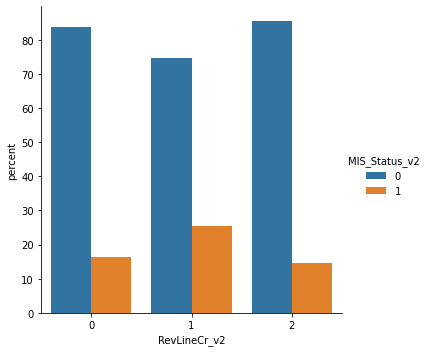

In [38]:
producePercentBarChart(rl_observations, 'RevLineCr_v2', target)

In [39]:
print(rl_test_stat, rl_crit_val, rl_p_val)

0.04503621977437652 1.386294361119891 0.9777335303890672


To explore this variable **without** the undefined values...

In [41]:
loan_eda_v2 = loan_eda_v1[loan_eda_v1['RevLineCr_v2'] != 0]

In [42]:
rl2_observations, rl2_test_stat, rl2_crit_val, rl2_p_val = cat2catComparison(loan_eda_v2, target, 'RevLineCr_v2')

In [43]:
display(rl2_observations)

,RevLineCr_v2,MIS_Status_v2,percent
0,1,0,74.573810
1,1,1,25.426190
2,2,0,85.501855
3,2,1,14.498145


In [44]:
print(rl2_test_stat, rl2_crit_val, rl2_p_val)

0.0 0.454936423119572 1.0


### LowDoc_v2

In [45]:
ld_observations, ld_test_stat, ld_crit_val, ld_p_val = cat2catComparison(loan_eda_v1, target, 'LowDoc_v2')

In [46]:
### 0 = undefined, 1 = yes, 2 = no

display(ld_observations)

,LowDoc_v2,MIS_Status_v2,percent
0,0,0,73.725556
1,0,1,26.274444
2,1,0,90.980729
3,1,1,9.019271
4,2,0,81.362093
5,2,1,18.637907


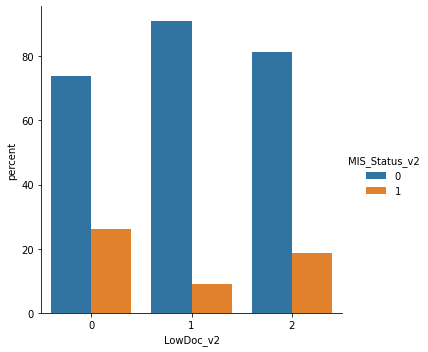

In [47]:
producePercentBarChart(ld_observations, 'LowDoc_v2', target)

In [48]:
print(ld_test_stat, ld_crit_val, ld_p_val)

0.1014046513739877 1.386294361119891 0.9505615861891149


## Numberical Analysis to MIS_Status_v2

### ApprovalFY

In [49]:
yr_summary, yr_corr, yr_p_val = cat2contComparison(loan_eda_v1, target, 'ApprovalFY')

In [50]:
display(yr_summary)

,amax,amin,mean,std,q25,q75,q95,q99
MIS_Status_v2,,,,,,,,
0,2014,1980,2000.588662,5.807987,1996.0,2005.0,2009.0,2012.0
1,2014,1980,2003.924954,5.295124,2003.0,2007.0,2008.0,2010.0


In [51]:
print(yr_corr, yr_p_val)

0.21637101927213698 0.0


<AxesSubplot:xlabel='ApprovalFY', ylabel='Count'>

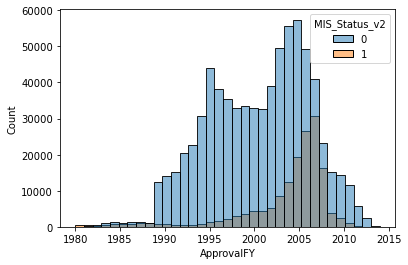

In [53]:
sns.histplot(x='ApprovalFY',
             hue='MIS_Status_v2',
             data=loan_eda_v1,
             bins=35)

## Come back to this section -- Could be something interesting here to investigate revolving the Great Recession

### Term

In [54]:
term_summary, term_corr, term_p_val = cat2contComparison(loan_eda_v1, target, 'Term')

In [55]:
display(term_summary)

,amax,amin,mean,std,q25,q75,q95,q99
MIS_Status_v2,,,,,,,,
0,569,0,122.299617,79.681249,77.0,180.0,300.0,300.0
1,461,0,56.673306,45.895888,29.0,68.0,142.0,255.0


In [56]:
print(term_corr, term_p_val)

-0.31604643417483114 0.0


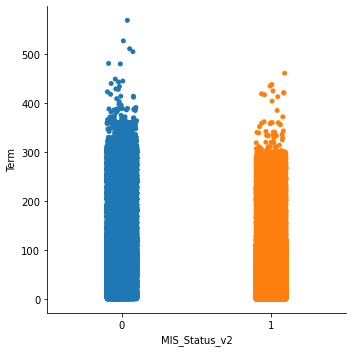

In [57]:
produceStripPlot(loan_eda_v1, target, 'Term')

### NoEmp

In [58]:
noe_summary, noe_corr, noe_p_val = cat2contComparison(loan_eda_v1, target, 'NoEmp')

In [59]:
display(noe_summary)

,amax,amin,mean,std,q25,q75,q95,q99
MIS_Status_v2,,,,,,,,
0,9999,0,12.312510,76.200925,2.0,11.0,42.0,100.0
1,9999,0,7.164871,61.689509,2.0,7.0,23.0,54.0


In [60]:
print(noe_corr, noe_p_val)

-0.026476951219330646 2.910325800223219e-138


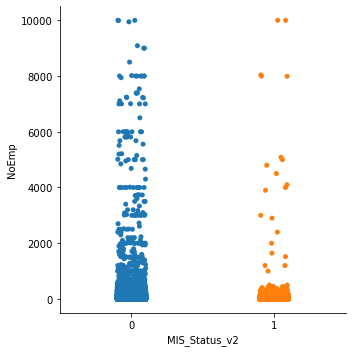

In [61]:
produceStripPlot(loan_eda_v1, target, 'NoEmp')

### CreateJob

In [62]:
cj_summary, cj_corr, cj_p_val = cat2contComparison(loan_eda_v1, target, 'CreateJob')

In [63]:
display(cj_summary)

,amax,amin,mean,std,q25,q75,q95,q99
MIS_Status_v2,,,,,,,,
0,8800,0,7.164793,210.464322,0.0,1.0,10.0,30.0
1,8800,0,14.657121,336.584929,0.0,2.0,7.0,23.0


In [64]:
print(cj_corr, cj_p_val)

0.011991995976922404 8.814297696915753e-30


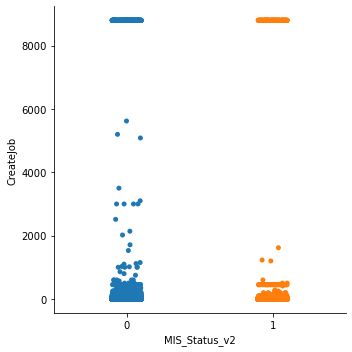

In [65]:
produceStripPlot(loan_eda_v1, target, 'CreateJob')

### RetainedJob

In [66]:
rj_summary, rj_corr, rj_p_val = cat2contComparison(loan_eda_v1, target, 'RetainedJob')

In [67]:
display(rj_summary)

,amax,amin,mean,std,q25,q75,q95,q99
MIS_Status_v2,,,,,,,,
0,9500,0,9.480229,210.953678,0.0,4.0,20.0,60.0
1,8800,0,17.280867,336.878006,0.0,5.0,16.0,41.0


In [69]:
print(rj_corr, rj_p_val)

0.012462793776100198 4.953774542298493e-32


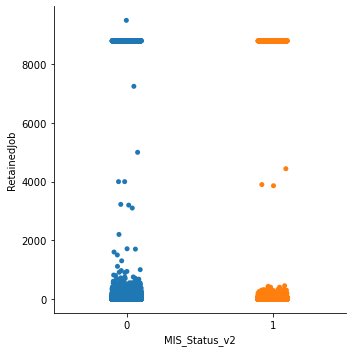

In [70]:
produceStripPlot(loan_eda_v1, target, 'RetainedJob')

### GrAppv

In [71]:
ga_summary, ga_corr, ga_p_val = cat2contComparison(loan_eda_v1, target, 'GrAppv')

In [72]:
display(ga_summary)

,amax,amin,mean,std,q25,q75,q95,q99
MIS_Status_v2,,,,,,,,
0,5472000.0,1000.0,208948.176737,294275.673103,40000.0,250000.0,800000.0,1400000.0
1,3500000.0,1000.0,118672.805589,212187.839581,25000.0,100000.0,500000.0,1119784.0


In [73]:
print(ga_corr, ga_p_val)

-0.12093194358972224 0.0


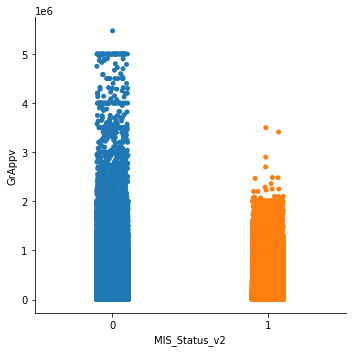

In [74]:
produceStripPlot(loan_eda_v1, target, 'GrAppv')

### SBA_Appv

In [75]:
sa_summary, sa_corr, sa_p_val = cat2contComparison(loan_eda_v1, target, 'SBA_Appv')

In [76]:
display(sa_summary)

,amax,amin,mean,std,q25,q75,q95,q99
MIS_Status_v2,,,,,,,,
0,5472000.0,500.0,163819.550819,239024.725153,25000.0,195000.0,672669.6,1050000.0
1,3411950.0,500.0,83798.458255,156305.896818,12500.0,80000.0,375000.0,750000.0


In [77]:
print(sa_corr, sa_p_val)

-0.13294745855562548 0.0


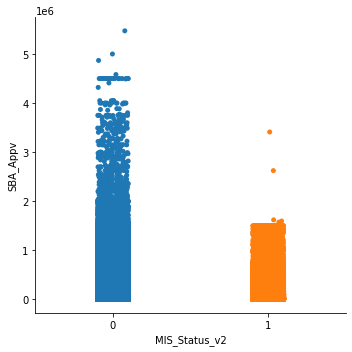

In [78]:
produceStripPlot(loan_eda_v1, target, 'SBA_Appv')

### Unemployment Rate

In [79]:
ur_summary, ur_corr, ur_p_val = cat2contComparison(loan_eda_v1, target, 'unemployment_rate')

In [80]:
display(ur_summary)

,amax,amin,mean,std,q25,q75,q95,q99
MIS_Status_v2,,,,,,,,
0,17.8,2.3,5.527656,1.591057,4.5,6.3,8.6,10.9
1,17.8,2.3,5.343825,1.501284,4.5,5.9,8.0,11.2


In [81]:
print(ur_corr, ur_p_val)

-0.04429685064487561 0.0


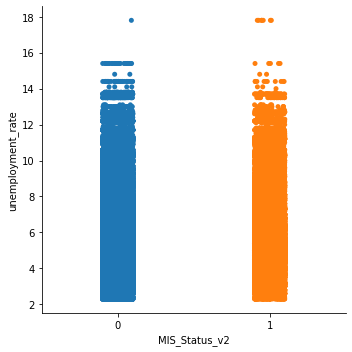

In [82]:
produceStripPlot(loan_eda_v1, target, 'unemployment_rate')

### GDP_Growth

In [84]:
gg_summary, gg_corr, gg_p_val = cat2contComparison(loan_eda_v1, target, 'gdp_growth')

In [85]:
display(gg_summary)

,amax,amin,mean,std,q25,q75,q95,q99
MIS_Status_v2,,,,,,,,
0,7.2366,-2.5368,2.885069,1.462928,1.8860,3.7989,4.4814,4.7532
1,7.2366,-2.5368,2.438241,1.553246,1.8762,3.5132,4.4814,4.7532


In [88]:
print(gg_corr, gg_p_val)

-0.11406257152311292 0.0


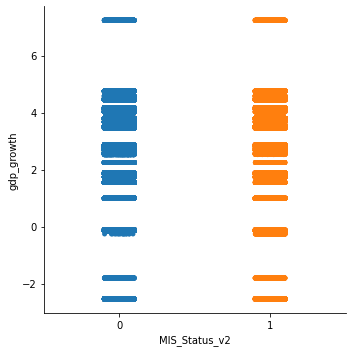

In [86]:
produceStripPlot(loan_eda_v1, target, 'gdp_growth')

### GDP Annual Change

In [87]:
gac_summary, gac_corr, gac_p_val = cat2contComparison(loan_eda_v1, target, 'gdp_annual_change')

In [89]:
display(gac_summary)

,amax,amin,mean,std,q25,q75,q95,q99
MIS_Status_v2,,,,,,,,
0,6.39,-4.34,-0.050776,1.546194,-0.98,0.94,2.65,5.1
1,6.39,-4.34,-0.462585,1.371570,-0.98,0.27,1.12,5.1


In [90]:
print(gac_corr, gac_p_val)

-0.10262375190584609 0.0


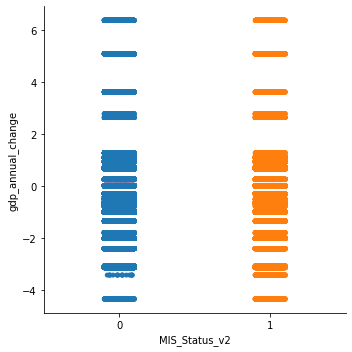

In [93]:
produceStripPlot(loan_eda_v1, target, 'gdp_annual_change')

### Inflation Rate

In [91]:
ir_summary, ir_corr, ir_p_val = cat2contComparison(loan_eda_v1, target, 'inflation_rate')

In [92]:
display(ir_summary)

,amax,amin,mean,std,q25,q75,q95,q99
MIS_Status_v2,,,,,,,,
0,13.5492,-0.3555,2.763421,0.895293,2.2701,3.2259,4.2350,5.398
1,13.5492,-0.3555,2.965495,1.066277,2.6772,3.3927,3.8391,5.398


In [94]:
print(ir_corr, ir_p_val)

0.08252083042704018 0.0


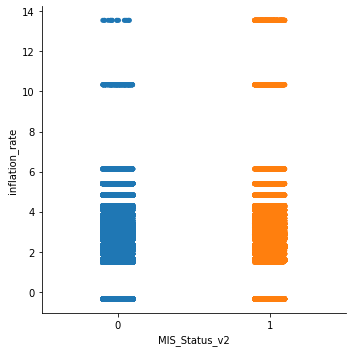

In [95]:
produceStripPlot(loan_eda_v1, target, 'inflation_rate')

### Inflation Rate Annual Change

In [96]:
irac_summary, irac_corr, irac_p_val = cat2contComparison(loan_eda_v1, target, 'inf_rate_annual_change')

KeyError: 'Column not found: inf_rate_annual_change'